# Understanding Bias and Variance in Machine Learning



Before diving into ensemble methods like Bagging, Random Forests, and Boosting, it’s essential to understand two core sources of error in machine learning models: **Bias** and **Variance**.

## The Total Error
The total prediction error of a model is composed of:
- **Bias²** (error from wrong assumptions)
- **Variance** (error from sensitivity to small fluctuations in training set)
- **Irreducible error** (noise in data)

### Total Expected Error:
$$
\text{Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$$


## Bias

**Bias** refers to the error due to **overly simplistic assumptions** in the learning algorithm.

- High bias leads to **underfitting**.
- Model misses the underlying patterns in the data.
- Occurs when model is too simple (e.g., Linear model on non-linear data).

### Example:
Predicting house prices with a linear model that doesn't account for non-linear interactions (like location, amenities, etc.)

### Visual Cue:
A model with high bias will predict almost the same function, regardless of the training data.

## Variance

**Variance** refers to the error due to **model complexity** and sensitivity to small fluctuations in training data.

- High variance leads to **overfitting**.
- The model captures noise as if it were signal.
- Happens when model is too complex relative to the dataset size.

### Example:
Using a deep decision tree or high-degree polynomial that fits training data perfectly but performs poorly on new data.

### Visual Cue:
A model with high variance gives very different results if trained on different subsets of the data.


## Bias-Variance Tradeoff

The goal in machine learning is to find a **balance** between Bias and Variance:

- **Low Bias + Low Variance** = Ideal (but hard to achieve)
- **High Bias + Low Variance** = Underfitting
- **Low Bias + High Variance** = Overfitting

### Tradeoff Diagram:
![Bias-Variance Tradeoff](https://upload.wikimedia.org/wikipedia/commons/9/9f/Bias_and_variance_contributing_to_total_error.svg)

> Ensemble methods like Bagging and Boosting are designed to address this tradeoff by reducing **variance**, **bias**, or both.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
# Generate synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(30, 1) * 2 - 1, axis=0)
y = X**3 + 0.1 * np.random.randn(30, 1)

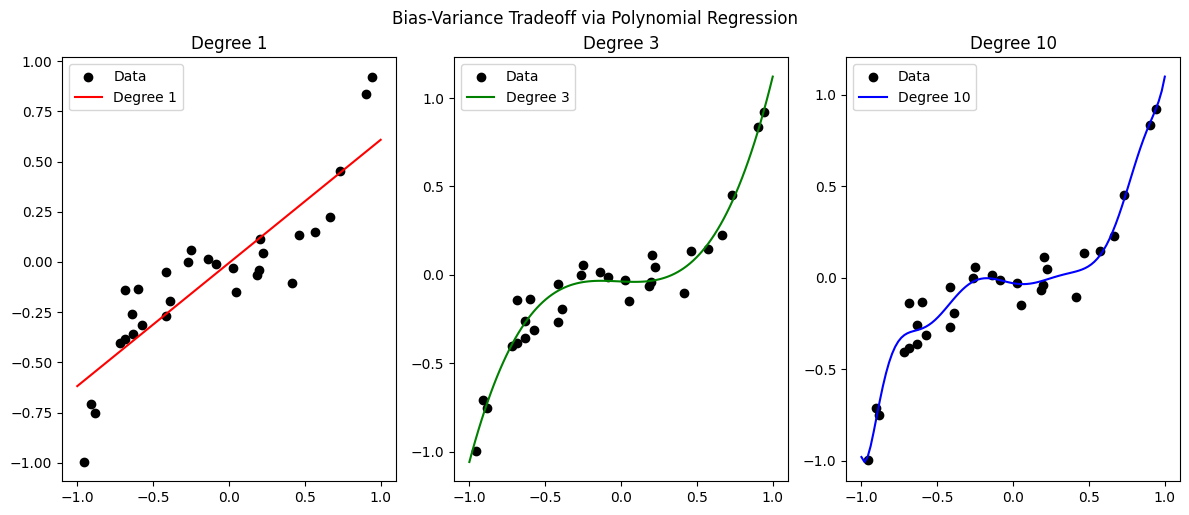

In [ ]:
# Models with increasing complexity
degrees = [1, 3, 10]
colors = ['r', 'g', 'b']
plt.figure(figsize=(12, 5))

for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    X_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='black', label='Data')
    plt.plot(X_plot, y_plot, color=colors[i], label=f'Degree {d}')
    plt.title(f'Degree {d}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Bias-Variance Tradeoff via Polynomial Regression', y=1.02)
plt.show()

## Summary: Bias and Variance

Think of a model like a student trying to learn a concept:

- **High Bias**: The student keeps repeating "the Earth is flat" no matter how much evidence you give, they have a rigid, oversimplified way of thinking. This is **underfitting**.
- **High Variance**: The student memorizes every single word of the textbook and even the printing mistakes. But give them a new question and they panic, this is **overfitting**.

The goal is a student who studies smartly — understands the real concept, doesn’t over-memorize, and can apply it to unseen problems.

That's what we try to build in machine learning too — a model that **generalizes well**, with the right **balance of bias and variance**.


# Overfitting and Underfitting



These two concepts describe how well a model fits the training data vs how well it generalizes to unseen data.

## Underfitting:
- Model is **too simple** to learn the underlying structure.
- Leads to **high bias**.
- Poor performance on both training and testing data.

## Overfitting:
- Model is **too complex**, fits even noise in the training data.
- Leads to **high variance**.
- Excellent performance on training data but poor generalization to test data.

### Quick Comparison:

| Criteria        | Underfitting            | Overfitting              |
|----------------|--------------------------|---------------------------|
| Model Complexity | Too Low                 | Too High                 |
| Bias            | High                    | Low                      |
| Variance        | Low                     | High                     |
| Training Error  | High                    | Low                      |
| Testing Error   | High                    | High                     |


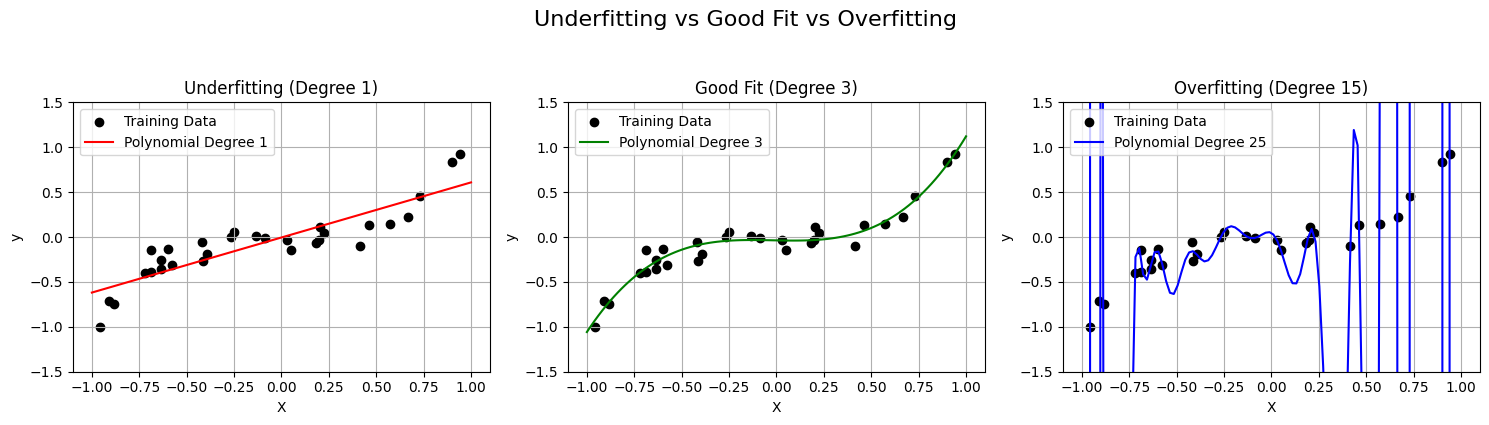

In [ ]:
# Plot with fixed axis scales
degrees = [1, 3, 15]
titles = ['Underfitting (Degree 1)', 'Good Fit (Degree 3)', 'Overfitting (Degree 15)']
colors = ['red', 'green', 'blue']

plt.figure(figsize=(15, 4))

# Generate smooth x-axis values
X_plot = np.linspace(-1, 1, 100).reshape(-1, 1)

# Loop through degrees
for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    model = LinearRegression()
    model.fit(poly.fit_transform(X), y)

    y_plot = model.predict(poly.transform(X_plot))

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='black', label='Training Data')
    plt.plot(X_plot, y_plot, color=colors[i], label=f'Polynomial Degree {d}')
    plt.title(titles[i])
    plt.xlabel("X")
    plt.ylabel("y")
    plt.ylim(-1.5, 1.5)        # fixed y-axis
    plt.xlim(-1.1, 1.1)        # fixed x-axis
    plt.legend()
    plt.grid(True)

plt.suptitle("Underfitting vs Good Fit vs Overfitting", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

## Training vs Testing Accuracy

To detect overfitting or underfitting in practice, we often look at the **training vs testing accuracy/loss curves** as model complexity increases:

- If both accuracies are low → Underfitting.
- If training accuracy is high but testing is low → Overfitting.
- If both are high and close → Good generalization.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    make_pipeline(PolynomialFeatures(degree=15), LinearRegression()),
    X, y.ravel(), cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Error')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve: Overfitting Example (Degree 15)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    make_pipeline(PolynomialFeatures(degree=15), LinearRegression()),
    X, y.ravel(), cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

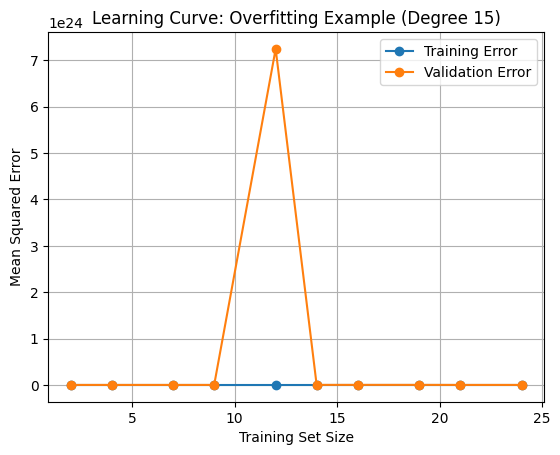

In [ ]:
#Plot
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Error')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve: Overfitting Example (Degree 15)')
plt.legend()
plt.grid(True)
plt.show()

## Summary: Overfitting vs Underfitting

Imagine you're preparing for a math exam:

- **Underfitting**: You only study addition and subtraction. When the exam comes, you're clueless about algebra or geometry. You didn’t learn enough.
- **Overfitting**: You memorize answers to 100 practice questions. But the actual exam asks 5 new ones — and you can’t solve them because you didn’t learn the concepts, just the answers.

The best student learns the concepts, practices reasonably, and doesn't panic in a new situation.

Machine learning models are the same, we want them to **understand patterns**, not memorize data.


# Ensemble Learning: Bagging, Random Forests, and Boosting (Gradient Boosting)


In this notebook, we will explore three powerful ensemble learning techniques:

1. **Bagging (Bootstrap Aggregating)**
2. **Random Forests**
3. **Boosting (Gradient Boosting)**

We will cover:
- Conceptual understanding
- Mathematical foundation
- Practical implementation using Python (`sklearn`)
- Visualizations and performance evaluation

Dataset used: **Breast Cancer Wisconsin Diagnostic Dataset**


## 1. Bagging: Bootstrap Aggregating



**Bagging** is an ensemble method that aims to reduce the variance of a model by creating multiple subsets of the data using **bootstrap sampling** (sampling with replacement). Each model is trained independently on a different subset, and their outputs are aggregated.

### Why Bagging Works?
- Reduces variance without increasing bias.
- Useful for high-variance models like **Decision Trees**.

### Aggregation:
- **Classification**: Majority Voting
- **Regression**: Averaging

### Mathematically:
Suppose we have B models $\{h_1(x), h_2(x), ..., h_B(x)\}$ trained on B different bootstrapped datasets.
- Final prediction for classification: $\hat{y} = \text{mode}(h_1(x), ..., h_B(x))$
- For regression: $\hat{y} = \frac{1}{B} \sum_{b=1}^{B} h_b(x)$

### Variance Reduction:
If base learners are i.i.d. with variance $\sigma^2$, Bagging reduces variance to $\frac{\sigma^2}{B}$.
If they are correlated with pairwise correlation $\rho$, the variance becomes:
$$
\text{Var}_{\text{Bag}} = \rho\sigma^2 + \frac{1 - \rho}{B} \sigma^2
$$

Lower correlation → greater variance reduction.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load and prepare the data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Base estimator: Decision Tree
base_tree = DecisionTreeClassifier(random_state=42)

# Bagging classifier
bagging_clf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=100,
    bootstrap=True,
    random_state=42
)

In [ ]:
# Fit and evaluate
bagging_clf.fit(X_train_scaled, y_train)
y_pred = bagging_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



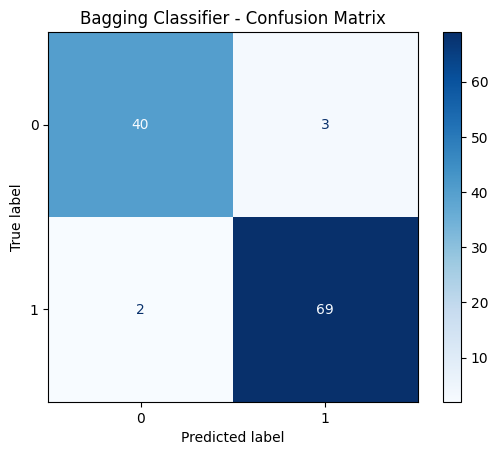

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_clf.classes_)
disp.plot(cmap='Blues')
plt.title("Bagging Classifier - Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score_bag = bagging_clf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score_bag)
roc_auc = auc(fpr, tpr)

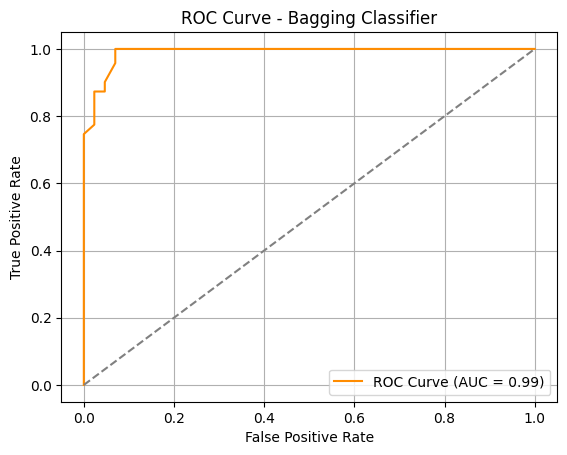

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation: Bagging Classifier

- **Accuracy**: Shows the overall correct predictions on test set.
- **Confusion Matrix**: Helps us identify **type of errors**, e.g., false positives vs false negatives.
- **ROC AUC Score**: AUC closer to 1 means high separability between classes.

> Bagging helps reduce **variance**, making it effective for models like decision trees that are unstable by nature.


## Summary: Bagging

Imagine you want to ask for movie recommendations.

- If you ask just one friend, they might give a biased answer.
- But if you ask **10 friends**, each with their own taste, and take a **majority vote**, you’ll probably end up with a more balanced recommendation.

Bagging is like that:
- Train 10 different models on **randomly selected portions of the data**.
- Combine their predictions through voting (for classification) or averaging (for regression).

Bagging reduces the risk of trusting just one biased or overfitting model. It's like taking the **wisdom of the crowd**.
